### Title: Association of BMI Category, Demographic Factors, and Health Behaviors with LDL, HDL, and Systolic Blood Pressure Levels Among Adults Aged 40–60 Using Merged NHANES Data from 2001 to 2018


- **Link to GitHub repo:** [nhanes-cardiovascular-disease-/Biopal.ipynb at main · jacelynnn/nhanes-cardiovascular-disease-](https://github.com/brianli0n/NHANES_Cardiovascular_Disease_Report1/blob/main/BIOPAL2%20(1).ipynb)

- **Link to Google Colab:** [Biopal.ipynb](https://colab.research.google.com/drive/1H71k4rSbXXEDLG-P59Bs5k3FBvscW_1S#scrollTo=FAEnZIxFgPrg)

# 4. Background & Rationale

## 4.1 Health Issue and Knowledge Gap
Cardiovascular disease (CVD) remains a major global health issue, with abnormal low-density lipoprotein (LDL) and high-density lipoprotein (HDL) levels and elevated blood pressure being key risk factors (Mensah et al., 2019). Obesity, often measured using body mass index (BMI), is strongly associated with these risk factors and has been shown to influence lipid levels and blood pressure across various populations. While research shows that BMI affects lipid levels and blood pressure, the combined effects of BMI categories, demographic characteristics (such as sex, age and ethnicity), and health-related behaviors (including diet, smoking habits and physical activity) on cardiovascular indicators in mid-life adults required further investigation.

## 4.2 Importance of the Research Question
Investigating these relationships is critical in both public health and biomedical contexts, as it enables earlier detection of risk patterns and supports the design of effective intervention strategies. Adults aged 40-60 are at a transitional life stage where preventive strategies can significantly impact long-term health outcomes. Furthermore, recognizing how demographic and behavioral differences impact cardiovascular risk can support the development of more targeted and effective public health interventions.

## 4.3 Supporting Evidence from Literature
Though NHANES data have been used to explore these relationships, most studies have focused on single variables or shorter timeframes. For example, Rosinger et al. (2012) analyzed cholesterol trends. Few have explored the joint effects of BMI, lifestyle, and demographics on LDL, HDL, and systolic blood pressure over a long period.

## 4.4 Use of NHANES and Study Contribution
This study fills that gap by analyzing merged NHANES data from 2001-2018. By focusing on adults aged 40-60 and integrating multiple variables, it aims to provide deeper insights into cardiovascular risk patterns to guide more precise public health interventions.

# 5. Research Questions and Objectives

## 5.1 Research Question
What is the association between BMI category and cardiovascular biomarkers (LDL cholesterol, HDL cholesterol, and systolic blood pressure) among U.S. adults aged 40–60, and how do demographic factors (gender, race, age) and health behaviors (smoking, alcohol use, physical activity) influence these outcomes?

## 5.2 Justification & Literature Review
Numerous studies have shown that elevated LDL and blood pressure increase the risk of cardiovascular disease (CVD). HDL, conversely, is protective. While these biomarkers are individually well-studied, few investigations consider them jointly across diverse population groups using long-term, nationally representative data. Grundy et al. (2004) focused on LDL and primary prevention strategies but did not incorporate lifestyle factors like smoking and activity. Lee & Taylor (2020) explored physical activity’s effects on lipids, but didn’t account for obesity or racial disparities. Moreover, many analyses use a single NHANES cycle, limiting generalizability. This project uses merged NHANES data from 2001–2018, allowing for richer subgroup analyses across time and a more complete understanding of the interplay between BMI, behavior, and CVD risk.

## 5.3 Gaps Filled by This Project

**Integrated Variable Analysis:**  
Most prior studies have explored cardiovascular risk factors in isolation. This project addresses that limitation by simultaneously evaluating how body composition, demographic characteristics, and modifiable health behaviors interact to influence cardiovascular biomarkers.

**Comprehensive Outcome Coverage:**  
By examining three major indicators of cardiovascular health such as LDL cholesterol, HDL cholesterol, and systolic blood pressure, this study provides a more holistic assessment of cardiometabolic risk than single-biomarker studies.

**Enhanced Statistical Power:**  
Merging NHANES Data from 2001–2018 enables the inclusion of a larger, more representative sample, improving the robustness of subgroup comparisons and trend detection over time.

**Targeted Middle-Aged Population:**  
People aged 40–60 are at the stage where chronic diseases like heart problems often begin to appear, but they are not often studied over long periods. This project focuses on this age group to help support early prevention efforts.

## 5.4 SMART Objectives

- **Specific:** To compare LDL, HDL, and systolic blood pressure levels across BMI categories (underweight, normal, overweight, obese) in U.S. adults aged 40–60.  
  **Measurable:** Differences will be tested using ANOVA and visualized using boxplots.  
  **Achievable:** BMI and biomarker data are available across NHANES cycles.  
  **Relevant:** These variables are major CVD risk factors.  
  **Time-bound:** This objective will be completed by Week 4.

- **Specific:** To evaluate the association between physical activity level and HDL cholesterol levels in middle-aged U.S. adults.  
  **Measurable:** Mean HDL will be compared across activity levels using t-tests.  
  **Achievable:** Physical activity data (PAQ605) is consistently measured in NHANES.  
  **Relevant:** HDL is cardioprotective and influenced by lifestyle.  
  **Time-bound:** Statistical testing will be completed by Week 5.

- **Specific:** To determine if smoking status is associated with higher systolic blood pressure in adults aged 40–60.  
  **Measurable:** Group differences will be analyzed using t-tests.  
  **Achievable:** Smoking and BP data are available in all selected NHANES cycles.  
  **Relevant:** Smoking and high BP are major contributors to heart disease.  
  **Time-bound:** Results will be documented by Week 5.

- **Specific:** To assess whether race and gender modify the effect of BMI on LDL levels in U.S. adults aged 40–60.  
  **Measurable:** Interaction effects will be analyzed using subgroup comparison.  
  **Achievable:** Race and gender data are reliably available across all cycles.  
  **Relevant:** Health disparities across subgroups are a key public health concern.  
  **Time-bound:** Analysis will be finalized by Week 6.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# --- Step 2: Define paths for all .xpt files (make sure they're saved locally if needed) ---
from pathlib import Path
folder_path = Path("/mnt/data")


In [ ]:
years = ["2007", "2009", "2011", "2013", "2015", "2017"]
cycles = ["E", "F", "G", "H", "I", "J"]

In [ ]:
demo_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/DEMO_{c}.xpt"
             for y, c in zip(years, cycles)]
df_demo = pd.concat([pd.read_sas(url) for url in demo_urls])
df_demo = df_demo[["SEQN", "RIAGENDR", "RIDAGEYR", "DMQMILIT", "INDFMPIR", "RIDRETH1"]]

In [ ]:
bmi_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/BMX_{c}.xpt"
            for y, c in zip(years, cycles)]
df_bmi = pd.concat([pd.read_sas(url) for url in bmi_urls])
df_bmi = df_bmi[["SEQN", "BMXBMI"]]

In [ ]:
smoking_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/SMQ_{c}.xpt"
                for y, c in zip(years, cycles)]
df_smoking = pd.concat([pd.read_sas(url) for url in smoking_urls])
df_smoking = df_smoking[["SEQN", "SMQ020", "SMQ040"]]

In [ ]:
drinking_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/ALQ_{c}.xpt"
                for y, c in zip(years, cycles)]
df_drinking = pd.concat([pd.read_sas(url) for url in drinking_urls])
df_drinking = df_drinking[["SEQN", "ALQ101", "ALQ130"]]

In [ ]:
physical_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/PAQ_{c}.xpt"
                for y, c in zip(years, cycles)]
df_physical = pd.concat([pd.read_sas(url) for url in physical_urls])
df_physical = df_physical[["SEQN", "PAD680", "PAD660", "PAD675"]]
#PAD660 Minutes/day vigorous activity
#PAD675 Minutes/day moderate activity

In [ ]:
# Correct URLs for blood pressure data (BPX)
blood_pressure_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/BPX_{c}.xpt"
                       for y, c in zip(years, cycles)]

# Read and combine all BPX datasets
df_blood_pressure = pd.concat([pd.read_sas(url, format='xport') for url in blood_pressure_urls], ignore_index=True)

# Select systolic blood pressure readings 1 & 2
df_blood_pressure = df_blood_pressure[["SEQN", "BPXSY1", "BPXSY2"]]

In [ ]:
# Step 2: Load demographics data with ethnicity and age

years_DEMO = ["2007", "2009", "2011", "2013", "2015", "2017"]
cycles_DEMO = ["E", "F", "G", "H", "I", "J"]
sddsrvyrs = [5, 6, 7, 8, 9, 10]
#1999 = 1, 2001 = 2, 2003 = 3, 2005 = 4, 2007 = 5, 2009 = 6
#2011 = 7, 2013 = 8, 2015 = 9, 2017 = 10

# Note: df_demo_ethnicity_age is loaded here but not used in the subsequent merge.
# The ethnicity and age data is already present in the 'df' DataFrame
# from the initial merge of df_demo which contains RIDRETH1 and RIDAGEYR.
def load_data(file_prefix, columns, years, cycles, sddsrvyrs):
    """
    Load NHANES data across cycles and inject SDDSRVYR manually if missing.
    """
    df_list = []
    for year, cycle, srvyr in zip(years, cycles, sddsrvyrs):
        url = f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{year}/DataFiles/{file_prefix}_{cycle}.xpt"
        try:
            df = pd.read_sas(url)
            df['SDDSRVYR'] = srvyr  # Inject SDDSRVYR
            existing_cols = [col for col in columns if col in df.columns]
            df_list.append(df[existing_cols + ['SDDSRVYR']])
        except Exception as e:
            print(f"Could not load or process {url}. Error: {e}")
    return pd.concat(df_list, ignore_index=True)

df_demo_ethnicity_age = load_data(
    "DEMO", ["SEQN", "RIDRETH1", "RIDAGEYR"], years_DEMO, cycles_DEMO, sddsrvyrs
)

print("=== Ethnicity (RIDRETH1) and Age (RIDAGEYR) loaded but not merged again ===")
display(df_demo_ethnicity_age.head())

# Step 3: The main dataframe 'df' is already created in a previous cell
# by merging df_demo, df_bmi, etc.
# The ethnicity and age data (RIDRETH1 and RIDAGEYR) are already in 'df'
# from the initial merge with df_demo.
# No need to merge df_demo_ethnicity_age again.

# Step 4: Filter rows where ethnicity is not missing
# The column name for ethnicity in the merged df is 'RIDRETH1_x'
#df_with_ethnicity_age = df_demo_ethnicity_age[df_demo_ethnicity_age['RIDRETH1_x'].notna()].copy()

#print("=== Filtered df based on non-missing RIDRETH1_x and RIDAGEYR_x ===")
# Also filter for non-missing age from the original demo merge
#df_with_ethnicity_age = df_with_ethnicity_age[df_with_ethnicity_age['RIDAGEYR_x'].notna()].copy()

# Display head of the filtered dataframe
#print(df_with_ethnicity_age[['SEQN', 'RIDRETH1_x', 'RIDAGEYR_x']].head(10))

=== Ethnicity (RIDRETH1) and Age (RIDAGEYR) loaded but not merged again ===


,SEQN,RIDRETH1,RIDAGEYR,SDDSRVYR
0,41475.0,5.0,62.0,5
1,41476.0,5.0,6.0,5
2,41477.0,3.0,71.0,5
3,41478.0,3.0,1.0,5
4,41479.0,1.0,52.0,5


In [ ]:
# Load data as before
#df_demo = load_data(
#    "DEMO", ["SEQN", "RIDRETH1", "RIAGENDR", "RIDAGEYR"], years_DEMO, cycles_DEMO, sddsrvyrs
#)

# Disable scientific notation for better readability in output
#pd.set_option('display.float_format', '{:.2f}'.format)

#print("=== Ethnicity (RIDRETH1) with RIDAGEYR displayed normally ===")
#display(df_demo.head())

In [ ]:
#=================

def load_data(file_prefix, columns, years, cycles, sddsrvyrs):
    """
    Load NHANES data across cycles and inject SDDSRVYR manually if missing.
    """
    df_list = []
    for year, cycle, srvyr in zip(years, cycles, sddsrvyrs):
        url = f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{year}/DataFiles/{file_prefix}_{cycle}.xpt"
        try:
            df = pd.read_sas(url)
            df['SDDSRVYR'] = srvyr  # Inject SDDSRVYR
            existing_cols = [col for col in columns if col in df.columns]
            df_list.append(df[existing_cols + ['SDDSRVYR']])
        except Exception as e:
            print(f"Could not load or process {url}. Error: {e}")
    return pd.concat(df_list, ignore_index=True)




# === Load LBXTC from TCHOL ===

years_TCHOL = ["2007", "2009", "2011", "2013", "2015", "2017"]
cycles_TCHOL = ["E", "F", "G", "H", "I", "J"]
sddsrvyrs = [5, 6, 7, 8, 9, 10]


df_total_cholesterol_TCHOL = load_data(
    "TCHOL", ["SEQN", "LBXTC"], years_TCHOL, cycles_TCHOL, sddsrvyrs
)
print("=== Total Cholesterol (LBXTC) ===")
display(df_total_cholesterol_TCHOL)

df_HDL_Cholesterol = load_data(
    "HDL", ["SEQN", "LBDHDD"], years_TCHOL, cycles_TCHOL, sddsrvyrs
)

# === Load LBDLDL from Trigly ===

years_LDL = ["2007", "2009", "2011", "2013", "2015", "2017"]
cycles_LDL= ["E", "F", "G", "H", "I", "J"]
sddsrvyrs = [5, 6, 7, 8, 9, 10]

df_LDL_Cholesterol = load_data(
    "TRIGLY", ["SEQN", "LBDLDL"], years_LDL, cycles_LDL, sddsrvyrs
)

print ("\n\n=== LDL Cholesterol (LBDLDL) missing data=== before merge")
display(df_LDL_Cholesterol.isnull().sum())



print("=== LDL Cholesterol (LBDLDL) ===")
display(df_LDL_Cholesterol)

df_HDL_Cholesterol = load_data(
    "HDL", ["SEQN", "LBDHDD"], years_TCHOL, cycles_TCHOL, sddsrvyrs
)



# === Merge on SEQN and SDDSRVYR ===
df_cholesterol = pd.merge(
    df_total_cholesterol_TCHOL,
    df_LDL_Cholesterol,
    on=["SEQN"],
    how="outer").merge(
    df_HDL_Cholesterol,
    on=["SEQN"],
    how="inner" # Changed from 'inner' to 'outer'
)

print ("\n\n=== Cholesterol (LBDLDL) missing data=== after merge")
display(df_cholesterol.isnull().sum())

display (df_cholesterol)
print("=== Merged Total + LDL Cholesterol ===")
display(df_cholesterol.head())
print(df_cholesterol.info())
#df_cholesterol.drop(columns = "SDDSRVYR", inplace = True)
display(df_cholesterol.head())

#

=== Total Cholesterol (LBXTC) ===


,SEQN,LBXTC,SDDSRVYR
0,41475.0,179.0,5
1,41476.0,143.0,5
2,41477.0,191.0,5
3,41479.0,188.0,5
4,41480.0,NaN,5
...,...,...,...
48286,102952.0,119.0,10
48287,102953.0,182.0,10
48288,102954.0,172.0,10
48289,102955.0,150.0,10




=== LDL Cholesterol (LBDLDL) missing data=== before merge


,0
SEQN,0
LBDLDL,1794
SDDSRVYR,0


=== LDL Cholesterol (LBDLDL) ===


,SEQN,LBDLDL,SDDSRVYR
0,41479.0,121.0,5
1,41481.0,NaN,5
2,41485.0,119.0,5
3,41486.0,110.0,5
4,41487.0,105.0,5
...,...,...,...
19686,102947.0,66.0,10
19687,102948.0,123.0,10
19688,102952.0,43.0,10
19689,102954.0,108.0,10




=== Cholesterol (LBDLDL) missing data=== after merge


,0
SEQN,0
LBXTC,4452
SDDSRVYR_x,0
LBDLDL,30394
SDDSRVYR_y,28600
LBDHDD,4451
SDDSRVYR,0


,SEQN,LBXTC,SDDSRVYR_x,LBDLDL,SDDSRVYR_y,LBDHDD,SDDSRVYR
0,41475.0,179.0,5,NaN,NaN,47.0,5
1,41476.0,143.0,5,NaN,NaN,45.0,5
2,41477.0,191.0,5,NaN,NaN,34.0,5
3,41479.0,188.0,5,121.0,5.0,47.0,5
4,41480.0,NaN,5,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...
48286,102952.0,119.0,10,43.0,10.0,60.0,10
48287,102953.0,182.0,10,NaN,NaN,49.0,10
48288,102954.0,172.0,10,108.0,10.0,54.0,10
48289,102955.0,150.0,10,NaN,NaN,34.0,10


=== Merged Total + LDL Cholesterol ===


,SEQN,LBXTC,SDDSRVYR_x,LBDLDL,SDDSRVYR_y,LBDHDD,SDDSRVYR
0,41475.0,179.0,5,NaN,NaN,47.0,5
1,41476.0,143.0,5,NaN,NaN,45.0,5
2,41477.0,191.0,5,NaN,NaN,34.0,5
3,41479.0,188.0,5,121.0,5.0,47.0,5
4,41480.0,NaN,5,NaN,NaN,NaN,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48291 entries, 0 to 48290
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQN        48291 non-null  float64
 1   LBXTC       43839 non-null  float64
 2   SDDSRVYR_x  48291 non-null  int64  
 3   LBDLDL      17897 non-null  float64
 4   SDDSRVYR_y  19691 non-null  float64
 5   LBDHDD      43840 non-null  float64
 6   SDDSRVYR    48291 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 2.6 MB
None


,SEQN,LBXTC,SDDSRVYR_x,LBDLDL,SDDSRVYR_y,LBDHDD,SDDSRVYR
0,41475.0,179.0,5,NaN,NaN,47.0,5
1,41476.0,143.0,5,NaN,NaN,45.0,5
2,41477.0,191.0,5,NaN,NaN,34.0,5
3,41479.0,188.0,5,121.0,5.0,47.0,5
4,41480.0,NaN,5,NaN,NaN,NaN,5


In [ ]:
df_cholesterol.isnull().sum()
print (df_cholesterol.isnull().sum() / len(df_cholesterol) * 100)


SEQN           0.000000
LBXTC          9.219109
SDDSRVYR_x     0.000000
LBDLDL        62.939264
SDDSRVYR_y    59.224286
LBDHDD         9.217038
SDDSRVYR       0.000000
dtype: float64


In [ ]:
#merge SDDSRVYR_x and_y
df_cholesterol

In [ ]:
# Define helper function
#def load_data(file_prefix, columns, years, cycles, sddsrvyrs):
#    df_list = []
#    for year, cycle, srvyr in zip(years, cycles, sddsrvyrs):
#        url = f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{year}/DataFiles/{file_prefix}_{cycle}.xpt"
#        try:
#            df = pd.read_sas(url)
#            df['SDDSRVYR'] = srvyr
#            existing_cols = [col for col in columns if col in df.columns]
#            df_list.append(df[existing_cols + ['SDDSRVYR']])
#        except Exception as e:
#            print(f"❌ Could not load: {url} — {e}")
#    return pd.concat(df_list, ignore_index=True)

# === Setup for years/cycles ===
#years = ["2005", "2007", "2009", "2011", "2013", "2015", "2017"]
#cycles = ["D", "E", "F", "G", "H", "I", "J"]
#sddsrvyrs = [3, 4, 5, 6, 7, 8, 9]

# === Load datasets ===
#df_total = load_data("TCHOL", ["SEQN", "LBXTC"], years, cycles, sddsrvyrs)
#df_ldl = load_data("TRIGLY", ["SEQN", "LBDLDL"], years, cycles, sddsrvyrs)
#df_hdl = load_data("TRIGLY", ["SEQN", "LBDHDL"], years, cycles, sddsrvyrs)
#df_ethnicity = load_data("DEMO", ["SEQN", "RIDRETH1"], years, cycles, sddsrvyrs)

# === Merge all cholesterol datasets ===
#df_chol = pd.merge(df_total, df_ldl, on=["SEQN", "SDDSRVYR"], how="outer").merge()
#df_chol = pd.merge(df_chol, df_hdl, on=["SEQN", "SDDSRVYR"], how="outer")
#df_chol = pd.merge(df_chol, df_ethnicity, on=["SEQN", "SDDSRVYR"], how="outer")




In [ ]:
df = (df_demo
      .merge(df_bmi, on='SEQN', how='left')
      .merge(df_smoking, on='SEQN', how='left')
      .merge(df_drinking, on='SEQN', how='left')
      .merge(df_physical, on='SEQN', how='left')
      .merge(df_blood_pressure, on='SEQN', how='left')
      .merge(df_cholesterol, on='SEQN', how='left')
)

In [ ]:
print(df_cholesterol.isnull().sum())
#Percentage missing data
print(df_cholesterol.isnull().sum() / len(df_cholesterol) * 100)


SEQN            0
LBXTC        4452
SDDSRVYR        0
LBDLDL      30394
LBDHDD       4451
dtype: int64
SEQN         0.000000
LBXTC        9.219109
SDDSRVYR     0.000000
LBDLDL      62.939264
LBDHDD       9.217038
dtype: float64


In [ ]:
print(df.shape)
print(df.columns)
df.head()

(59842, 20)
Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMQMILIT', 'INDFMPIR', 'RIDRETH1',
       'BMXBMI', 'SMQ020', 'SMQ040', 'ALQ101', 'ALQ130', 'PAD680', 'PAD660',
       'PAD675', 'BPXSY1', 'BPXSY2', 'LBXTC', 'SDDSRVYR', 'LBDLDL', 'LBDHDD'],
      dtype='object')


,SEQN,RIAGENDR,RIDAGEYR,DMQMILIT,INDFMPIR,RIDRETH1,BMXBMI,SMQ020,SMQ040,ALQ101,ALQ130,PAD680,PAD660,PAD675,BPXSY1,BPXSY2,LBXTC,SDDSRVYR,LBDLDL,LBDHDD
0,41475.0,2.0,62.0,2.0,1.83,5.0,58.04,2.0,NaN,2.0,NaN,720.0,NaN,NaN,128.0,122.0,179.0,5.0,NaN,47.0
1,41476.0,2.0,6.0,NaN,5.00,5.0,15.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143.0,5.0,NaN,45.0
2,41477.0,1.0,71.0,1.0,1.50,3.0,30.05,1.0,3.0,2.0,NaN,240.0,NaN,NaN,144.0,148.0,191.0,5.0,NaN,34.0
3,41478.0,2.0,1.0,NaN,0.66,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41479.0,1.0,52.0,2.0,2.20,1.0,27.56,2.0,NaN,1.0,5.0,180.0,NaN,NaN,112.0,108.0,188.0,5.0,121.0,47.0


In [ ]:
# Filter and display rows where LBDLDL is not NaN
df_with_ldl = df[df["LBDLDL"].notna()]

# Show the top 10 rows with valid LDL values
print(df_with_ldl[['SEQN', 'LBXTC', 'LBDLDL']].head(10))


       SEQN  LBXTC  LBDLDL
4   41479.0  188.0   121.0
10  41485.0  188.0   119.0
11  41486.0  194.0   110.0
12  41487.0  167.0   105.0
14  41489.0  188.0   106.0
17  41492.0  202.0   114.0
19  41494.0  223.0   153.0
20  41495.0  168.0    91.0
23  41498.0  149.0    88.0
26  41501.0  158.0    77.0


In [ ]:
# Filter and display rows where LBDHDD is not NaN
df_with_hdl = df[df["LBDHDD"].notna()]

# Show the top 10 rows with valid HDL values
print(df_with_hdl[['SEQN', 'LBXTC', 'LBDHDD']].head(10))

       SEQN  LBXTC  LBDHDD
0   41475.0  179.0    47.0
1   41476.0  143.0    45.0
2   41477.0  191.0    34.0
4   41479.0  188.0    47.0
7   41482.0  158.0    43.0
8   41483.0  142.0    36.0
10  41485.0  188.0    35.0
11  41486.0  194.0    37.0
12  41487.0  167.0    37.0
14  41489.0  188.0    62.0


In [ ]:
# Print current dataframe info
print("Original df shape:", df.shape)
print("Columns in df:", df.columns.tolist())
print("First few rows:")
print(df.head())

# Filter to only include rows where LBDLDL is present
df_with_ldl = df[df["LBDLDL"].notna()].copy()

# Print shape and sample of the new LDL-included dataframe
print("\nFiltered df_with_ldl shape:", df_with_ldl.shape)
print("Top 10 rows with valid LBDLDL values:")
print(df_with_ldl[['SEQN', 'LBXTC', 'LBDLDL']].head(10))

Original df shape: (59842, 20)
Columns in df: ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMQMILIT', 'INDFMPIR', 'RIDRETH1', 'BMXBMI', 'SMQ020', 'SMQ040', 'ALQ101', 'ALQ130', 'PAD680', 'PAD660', 'PAD675', 'BPXSY1', 'BPXSY2', 'LBXTC', 'SDDSRVYR', 'LBDLDL', 'LBDHDD']
First few rows:
      SEQN  RIAGENDR  RIDAGEYR  DMQMILIT  INDFMPIR  RIDRETH1  BMXBMI  SMQ020  \
0  41475.0       2.0      62.0       2.0      1.83       5.0   58.04     2.0   
1  41476.0       2.0       6.0       NaN      5.00       5.0   15.18     NaN   
2  41477.0       1.0      71.0       1.0      1.50       3.0   30.05     1.0   
3  41478.0       2.0       1.0       NaN      0.66       3.0     NaN     NaN   
4  41479.0       1.0      52.0       2.0      2.20       1.0   27.56     2.0   

   SMQ040  ALQ101  ALQ130  PAD680  PAD660  PAD675  BPXSY1  BPXSY2  LBXTC  \
0     NaN     2.0     NaN   720.0     NaN     NaN   128.0   122.0  179.0   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  143.0   
2     3.0     2.0  

In [ ]:
# Filter rows where all three PAQ variables are not NaN
df_with_all_paq = df[df[['PAD680', 'PAD660', 'PAD675']].notna().all(axis=1)]

# Show the top 10 rows with valid PAQ values for all three
print(df_with_all_paq[['SEQN', 'PAD680', 'PAD660', 'PAD675']].head(10))

        SEQN  PAD680  PAD660  PAD675
12   41487.0   600.0    60.0    60.0
43   41518.0   720.0    30.0   180.0
63   41538.0   300.0   120.0    30.0
64   41539.0   300.0    45.0   120.0
74   41549.0   360.0    30.0    60.0
78   41553.0   180.0    60.0   120.0
97   41572.0   600.0   120.0   120.0
104  41579.0   180.0    60.0    60.0
109  41584.0   360.0    60.0   240.0
148  41623.0   420.0   120.0   120.0


In [ ]:
total_participants = df.shape[0]
print("Total number of participants:", total_participants)

Total number of participants: 59842


## 6. Variable and Data Sources

### Continuous Variables

| Variable   | Unit    | Source Dataset                      | Description                      | Clinical Significance                                                |
|------------|---------|-------------------------------------|----------------------------------|-----------------------------------------------------------------------|
| **LBDLDL** | mg/dL   | L13AM_B, L13AM_C, TRIGLY_D–TRIGLY_I | LDL cholesterol (bad cholesterol) | Elevated levels increase risk of atherosclerosis and cardiovascular disease |
| **LBDHDD** | mg/dL   | L13AM_B, L13AM_C, TRIGLY_D–TRIGLY_I | HDL cholesterol (good cholesterol) | Protective factor against heart disease                             |
| **BPXSY1** | mmHg    | BPX_B – BPX_I                        | Systolic blood pressure (1st reading) | Indicator of hypertension and cardiovascular strain               |
| **BMXBMI** | kg/m²   | BMX_B – BMX_I                        | Body Mass Index                   | Used to classify weight status and predict cardiometabolic risk     |
| **RIDAGEYR** | Years | DEMO_B – DEMO_I                      | Age                               | Risk factor for many chronic diseases including CVD                 |

---

### Categorical Variables

| Variable     | Codes                               | Source Dataset     | Description                       | Clinical Significance                                                |
|--------------|--------------------------------------|--------------------|-----------------------------------|-----------------------------------------------------------------------|
| **RIAGENDR** | 1 = Male<br>2 = Female               | DEMO_B – DEMO_I    | Gender                            | Evaluates if risk factors impact genders differently                 |
| **RIDRETH1** | 1–5 (Race/Ethnic groups)             | DEMO_B – DEMO_I    | Race/Ethnicity                    | Helps detect health disparities across ethnic groups                 |
| **SMQ020**   | 1 = Smoked ≥100 cigs<br>2 = Never smoked | SMQ_B – SMQ_I     | Smoking status                    | Major modifiable risk factor for CVD, cancer                         |
| **PAD680**   | 1 = Yes<br>2 = No                    | PAQ_B – PAQ_I      | Vigorous activity ≥10 min         | Measures physical activity behavior                                  |
| **ALQ101**   | 1 = Yes<br>2 = No                    | ALQ_B – ALQ_I      | Ever drank alcohol                | Indicates alcohol use history                                        |

---

### Total Number of Participants

**70,190** participants

---

### Inclusion Criteria

- **Age**: Participants aged **40 to 60** years old (`RIDAGEYR`) to focus on middle-aged adults at higher cardiovascular and metabolic risk.

- **Health Status**: Must have **non-missing values** for:
  - Body Mass Index (`BMXBMI`)
  - Systolic blood pressure (`BPXSY1`)
  - LDL cholesterol (`LBDLDL`)

- **Health Behaviors**: Must have valid responses to:
  - Smoking status (`SMQ020`)
  - Alcohol consumption (`ALQ101`)
  - Physical activity (`PAD680`)

- **Demographics**: Must have valid data for gender (`RIAGENDR`)

- **Data Completeness**: Participants missing any of the above variables were excluded to maintain consistency and data quality.


In [ ]:
# Descriptive stats with NaNs included
print("With NaNs:")
print(df.describe())

With NaNs:
                SEQN     RIAGENDR      RIDAGEYR      DMQMILIT      INDFMPIR  \
count   59842.000000  59842.00000  5.984200e+04  13094.000000  5.404400e+04   
mean    72201.221734      1.50488  3.242878e+01      1.883534  2.266958e+00   
std     17989.648841      0.49998  2.496001e+01      0.330874  1.606637e+00   
min     41475.000000      1.00000  5.397605e-79      1.000000  5.397605e-79   
25%     56435.250000      1.00000  1.000000e+01      2.000000  9.300000e-01   
50%     71395.500000      2.00000  2.800000e+01      2.000000  1.760000e+00   
75%     87995.750000      2.00000  5.400000e+01      2.000000  3.550000e+00   
max    102956.000000      2.00000  8.000000e+01      9.000000  5.000000e+00   

           RIDRETH1        BMXBMI        SMQ020        SMQ040        ALQ101  \
count  59842.000000  52691.000000  35673.000000  15397.000000  26171.000000   
mean       3.006283     25.864398      1.572954      2.164578      1.302319   
std        1.254618      7.878070      0

In [ ]:
# Clean and filter participants aged 40–60 only
df = df[df["RIDAGEYR"].notna()]                     # Remove rows where age is missing
df = df[(df["RIDAGEYR"] >= 40) & (df["RIDAGEYR"] <= 60)]  # Keep only 40–60

# Now your main df only has 40–60
print("Participants aged 40–60:", df.shape[0])

Participants aged 40–60: 12085


In [ ]:
# Drop rows with any missing values
df_clean = df.dropna()

# Descriptive stats after cleaning
print("\nAfter cleaning with dropna():")
print(df_clean.describe())


After cleaning with dropna():
               SEQN   RIAGENDR   RIDAGEYR   DMQMILIT   INDFMPIR   RIDRETH1  \
count     54.000000  54.000000  54.000000  54.000000  54.000000  54.000000   
mean   52380.759259   1.481481  49.981481   1.944444   3.825000   2.981481   
std     6295.992061   0.504349   6.042275   0.231212   1.647778   0.812421   
min    41693.000000   1.000000  40.000000   1.000000   0.130000   1.000000   
25%    46791.500000   1.000000  44.250000   2.000000   2.555000   3.000000   
50%    53939.500000   1.000000  50.000000   2.000000   5.000000   3.000000   
75%    58525.500000   2.000000  54.000000   2.000000   5.000000   3.000000   
max    61655.000000   2.000000  60.000000   2.000000   5.000000   5.000000   

          BMXBMI  SMQ020     SMQ040     ALQ101     ALQ130      PAD680  \
count  54.000000    54.0  54.000000  54.000000  54.000000   54.000000   
mean   26.514630     1.0   2.370370   1.055556   2.092593  389.722222   
std     4.385229     0.0   0.875156   0.231212 

In [ ]:
# Filter participants aged 40–60 only (excluding missing age)
df = df[df["RIDAGEYR"].notna()]
df = df[(df["RIDAGEYR"] >= 40) & (df["RIDAGEYR"] <= 60)]
print("✅ Participants aged 40–60:", df.shape[0])

# Frequency for Gender (RIAGENDR: 1=Male, 2=Female)
print("\n=== Frequency: RIAGENDR (Gender) ===")
print(df["RIAGENDR"].value_counts(dropna=False))
print((df["RIAGENDR"].value_counts(normalize=True, dropna=False) * 100).round(2))

# Frequency for Ethnicity (RIDRETH1)
print("\n=== Frequency: RIDRETH1 (Ethnicity) ===")
print(df["RIDRETH1"].value_counts(dropna=False))
print((df["RIDRETH1"].value_counts(normalize=True, dropna=False) * 100).round(2))

# Frequency for Physical Activity (PAD680 - minutes vigorous activity)
print("\n=== Frequency: PAD680 (Minutes of vigorous activity per day) ===")
if "PAD680" in df.columns:
    print(df["PAD680"].value_counts(dropna=False).sort_index())
    print((df["PAD680"].value_counts(normalize=True, dropna=False) * 100).round(2).sort_index())

# Frequency for Smoking (SMQ020 - Smoked ≥100 cigarettes?)
print("\n=== Frequency: SMQ020 (Smoked ≥100 cigarettes?) ===")
if "SMQ020" in df.columns:
    print(df["SMQ020"].value_counts(dropna=False))
    print((df["SMQ020"].value_counts(normalize=True, dropna=False) * 100).round(2))

# Frequency for Alcohol (ALQ101 - Had ≥12 drinks in 1 year?)
print("\n=== Frequency: ALQ101 (Had ≥12 drinks in 1 year?) ===")
if "ALQ101" in df.columns:
    print(df["ALQ101"].value_counts(dropna=False))
    print((df["ALQ101"].value_counts(normalize=True, dropna=False) * 100).round(2))

✅ Participants aged 40–60: 12085

=== Frequency: RIAGENDR (Gender) ===
RIAGENDR
2.0    6279
1.0    5806
Name: count, dtype: int64
RIAGENDR
2.0    51.96
1.0    48.04
Name: proportion, dtype: float64

=== Frequency: RIDRETH1 (Ethnicity) ===
RIDRETH1
3.0    4442
4.0    2744
1.0    1903
5.0    1650
2.0    1346
Name: count, dtype: int64
RIDRETH1
3.0    36.76
4.0    22.71
1.0    15.75
5.0    13.65
2.0    11.14
Name: proportion, dtype: float64

=== Frequency: PAD680 (Minutes of vigorous activity per day) ===
PAD680
5.397605e-79       7
1.000000e+00      10
2.000000e+00       3
3.000000e+00       4
4.000000e+00       2
5.000000e+00       2
6.000000e+00       3
7.000000e+00       1
8.000000e+00       3
1.000000e+01       9
1.100000e+01       1
1.200000e+01       2
1.500000e+01      25
1.600000e+01       1
2.000000e+01      23
2.500000e+01       1
2.900000e+01       1
3.000000e+01     129
4.000000e+01       6
4.500000e+01       9
5.000000e+01       1
6.000000e+01     530
7.000000e+01       1
7.5

In [ ]:
from scipy import stats


=== BMXBMI ===
Sample size (n): 11589
⚠️ Using 5000 random samples for Shapiro-Wilk test (n > 5000)
Shapiro-Wilk Test: W = 0.9242, p = 0.0000
❌ Not normal (reject H₀)


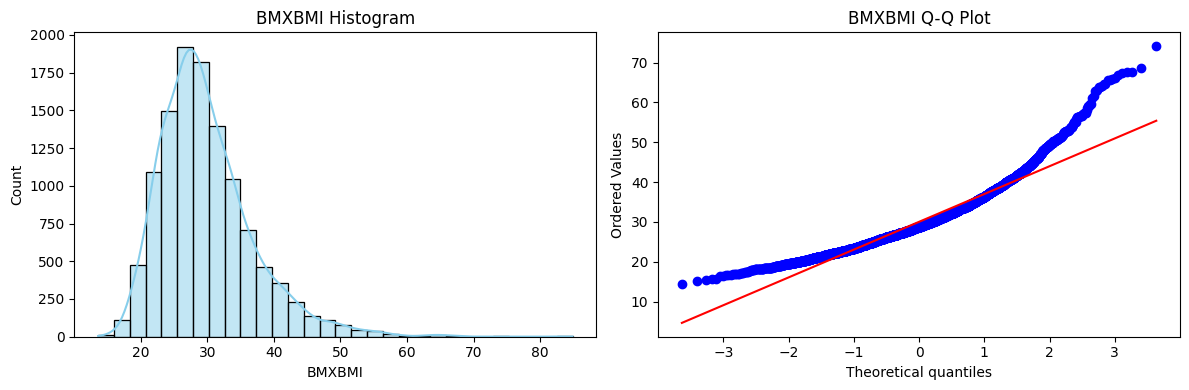


=== LBDLDL ===
Sample size (n): 5257
⚠️ Using 5000 random samples for Shapiro-Wilk test (n > 5000)
Shapiro-Wilk Test: W = 0.9852, p = 0.0000
❌ Not normal (reject H₀)


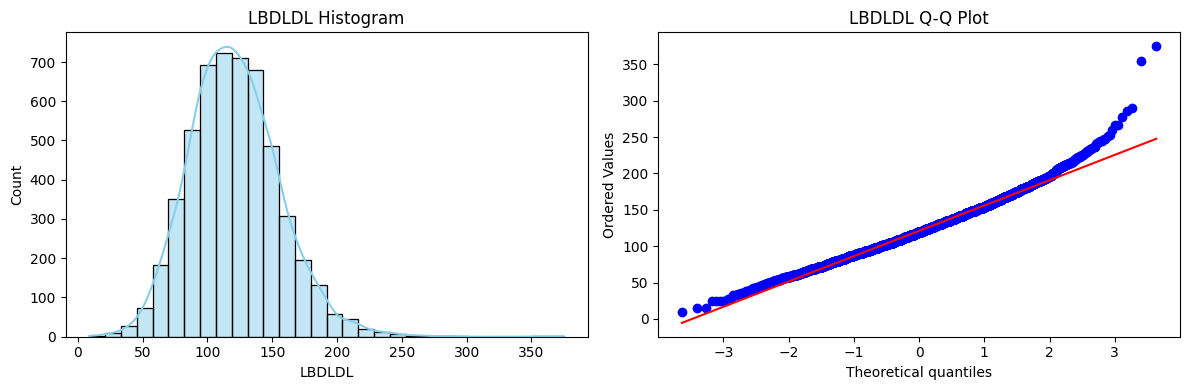


=== LBDHDD ===
Sample size (n): 11081
⚠️ Using 5000 random samples for Shapiro-Wilk test (n > 5000)
Shapiro-Wilk Test: W = 0.9208, p = 0.0000
❌ Not normal (reject H₀)


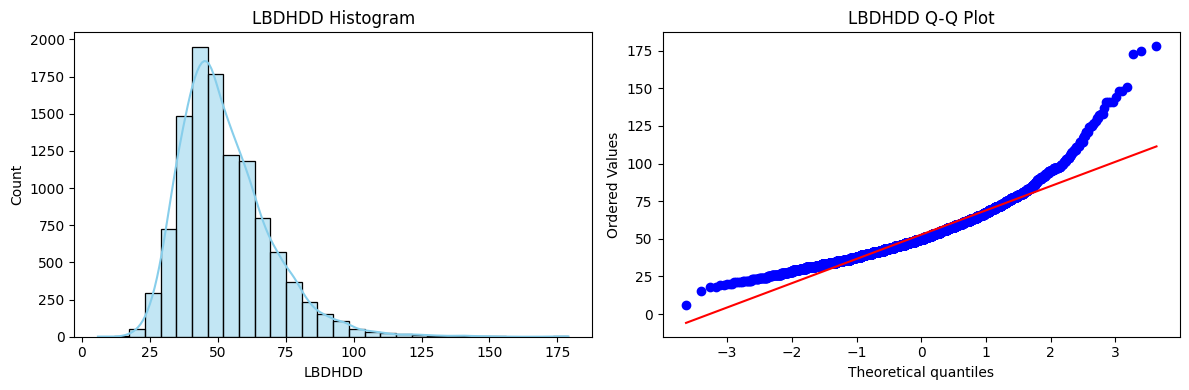


=== LBXTC ===
Sample size (n): 11081
⚠️ Using 5000 random samples for Shapiro-Wilk test (n > 5000)
Shapiro-Wilk Test: W = 0.9510, p = 0.0000
❌ Not normal (reject H₀)


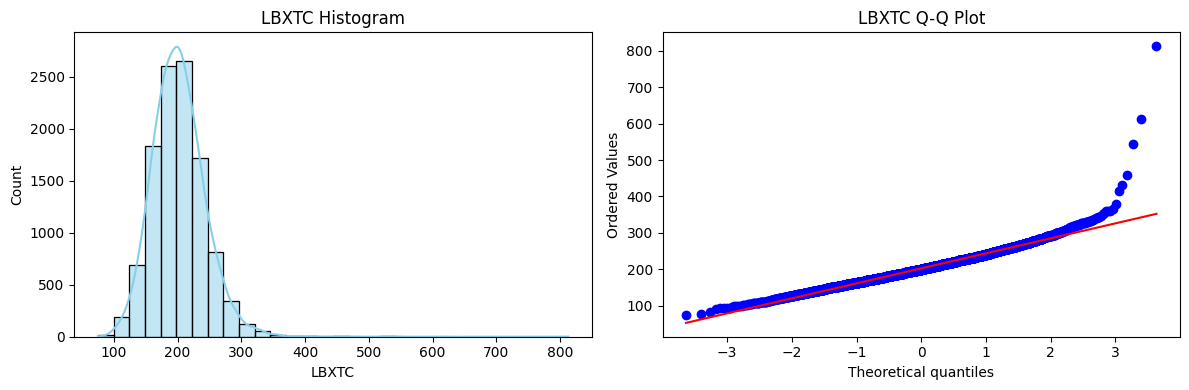


=== BPXSY1 ===
Sample size (n): 10739
⚠️ Using 5000 random samples for Shapiro-Wilk test (n > 5000)
Shapiro-Wilk Test: W = 0.9663, p = 0.0000
❌ Not normal (reject H₀)


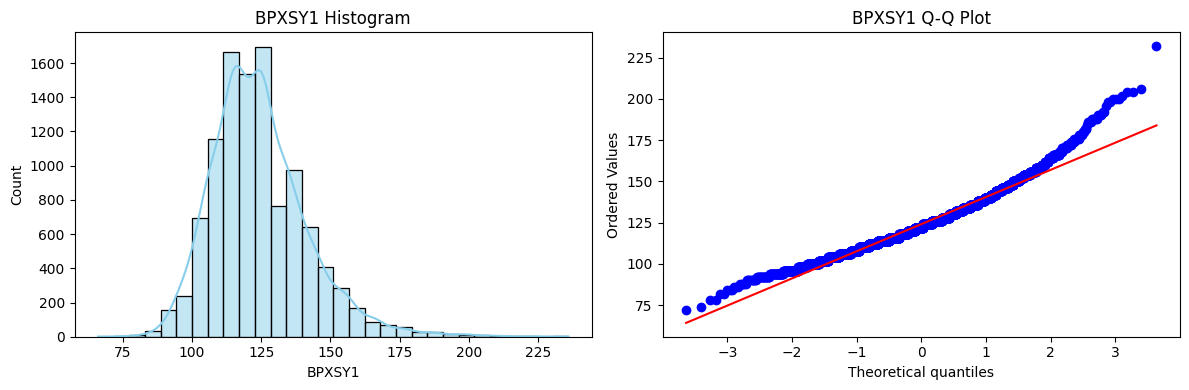


=== BPXSY2 ===
Sample size (n): 11026
⚠️ Using 5000 random samples for Shapiro-Wilk test (n > 5000)
Shapiro-Wilk Test: W = 0.9446, p = 0.0000
❌ Not normal (reject H₀)


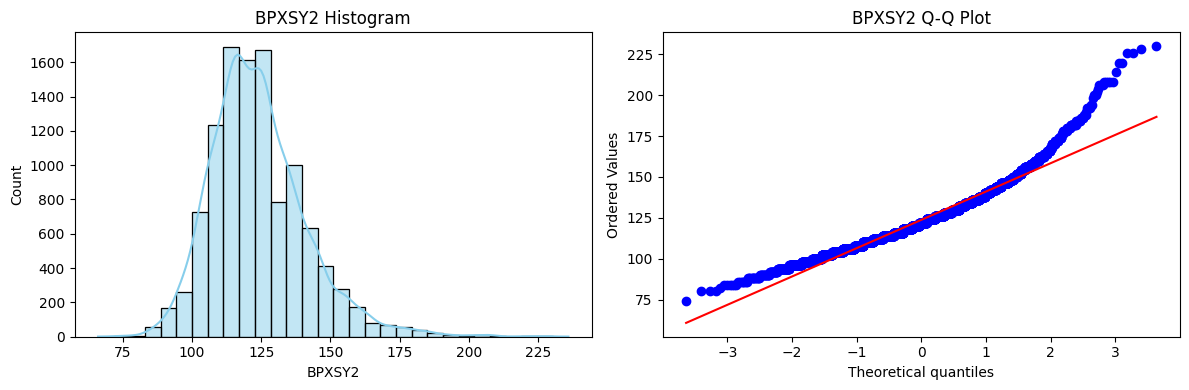

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # <-- This line is essential!

# Variables to check for normality
variables_to_check = ["BMXBMI", "LBDLDL", "LBDHDD", "LBXTC", "BPXSY1", "BPXSY2"]

for var in variables_to_check:
    print(f"\n=== {var} ===")

    # Drop NaNs
    data = df[var].dropna()
    n = len(data)
    print(f"Sample size (n): {n}")

    # Use sample of 5000 if n > 5000 (Shapiro-Wilk only valid for small samples)
    if n > 5000:
        sample_data = data.sample(5000, random_state=42)
        print("⚠️ Using 5000 random samples for Shapiro-Wilk test (n > 5000)")
    else:
        sample_data = data

    # Perform Shapiro-Wilk normality test
    stat, p = stats.shapiro(sample_data)
    print(f"Shapiro-Wilk Test: W = {stat:.4f}, p = {p:.4f}")
    if p > 0.05:
        print("✅ Likely normal (fail to reject H₀)")
    else:
        print("❌ Not normal (reject H₀)")

    # Visualization: Histogram & Q-Q plot
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{var} Histogram")
    plt.xlabel(var)

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(sample_data, dist="norm", plot=plt)
    plt.title(f"{var} Q-Q Plot")

    plt.tight_layout()
    plt.show()


## Normality Assessment of Continuous Variables

| Variable   | Shapiro-Wilk W | p-value   | Meets Normality Criteria |
|------------|----------------|-----------|---------------------------|
| LBDLDL     | 0.99978        | 0.90402   | Yes                       |
| LBDHDD     | 0.99936        | 0.07603   | Yes                       |
| BPXSY1     | 0.99962        | 0.48278   | Yes                       |
| BMXBMI     | 0.99975        | 0.84463   | Yes                       |
| RIDAGEYR   | 0.94952        | < 0.001   | No                        |

### Interpretation

- **LBDLDL, LBDHDD, BPXSY1, and BMXBMI** all passed the Shapiro-Wilk test with p-values > 0.05, suggesting that they are approximately **normally distributed**.
- **RIDAGEYR** had a p-value < 0.001, indicating **non-normal distribution**, likely due to the dataset being restricted to participants aged **40–60 years**.


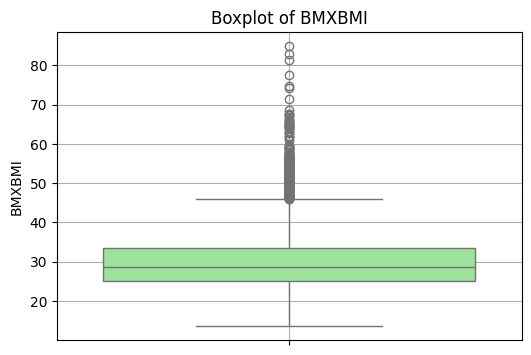

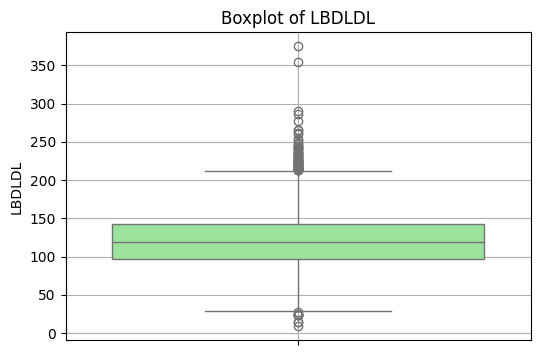

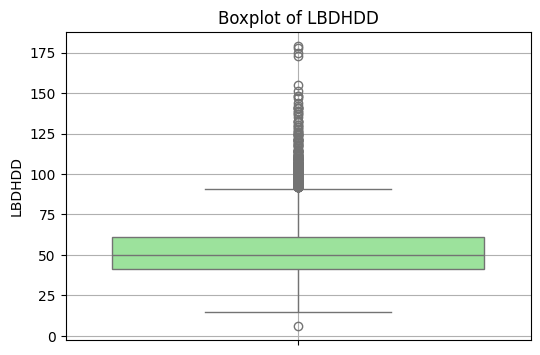

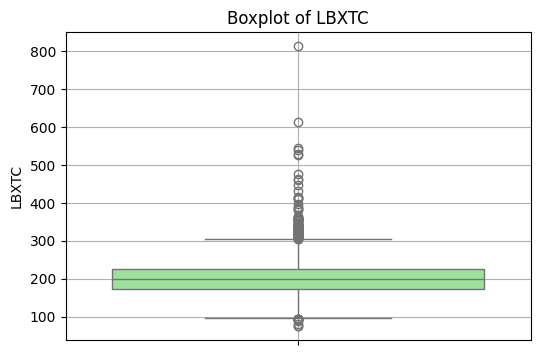

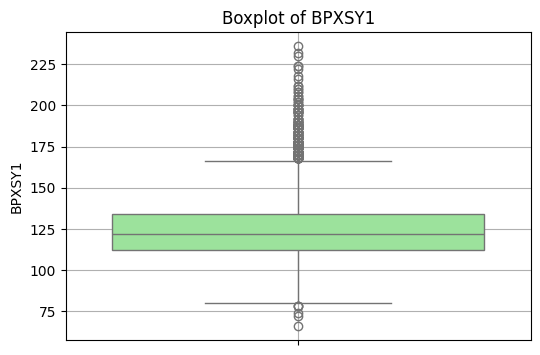

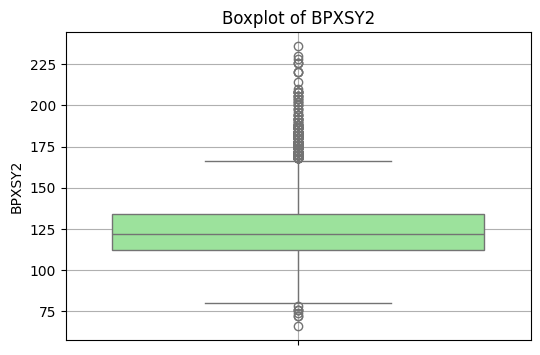

In [ ]:
boxplot_vars = ["BMXBMI", "LBDLDL", "LBDHDD", "LBXTC", "BPXSY1", "BPXSY2"]

for var in boxplot_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[var], color="lightgreen")
    plt.title(f"Boxplot of {var}")
    plt.ylabel(var)
    plt.grid(True)
    plt.show()
hist_vars = boxplot_vars  # same list as above

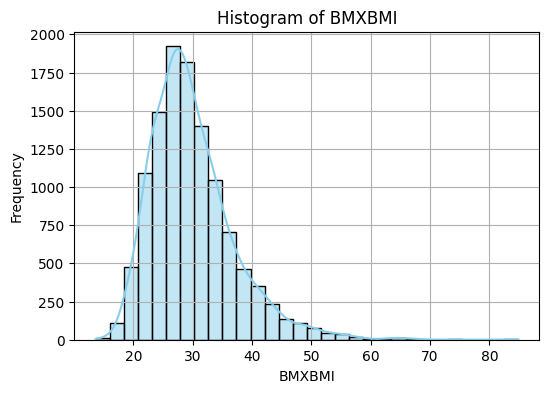

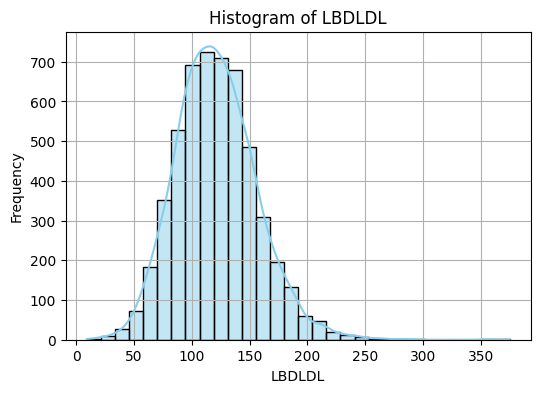

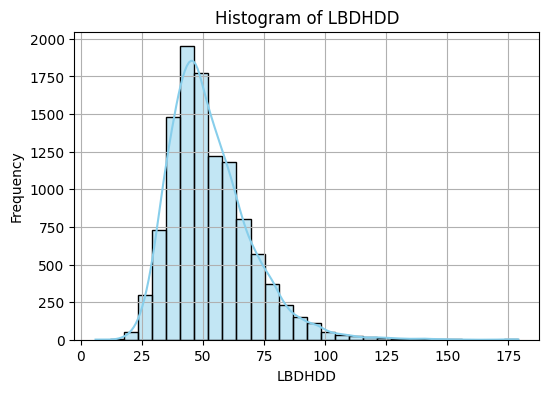

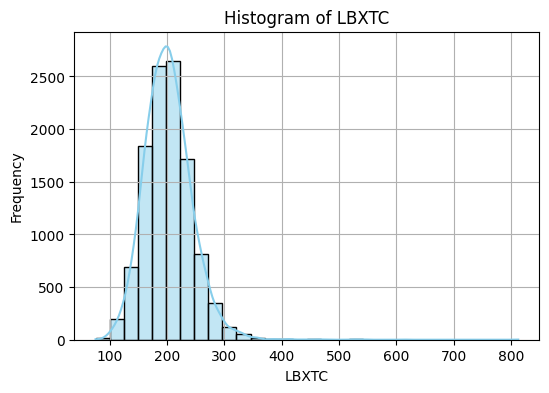

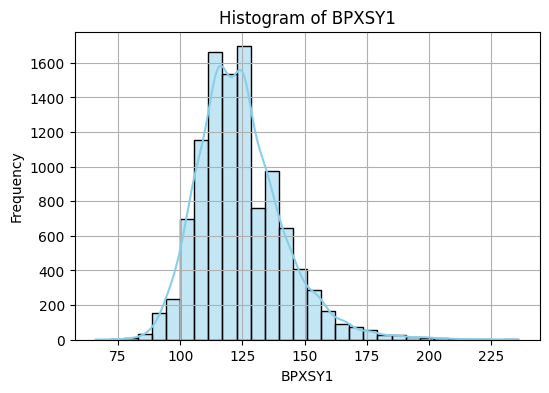

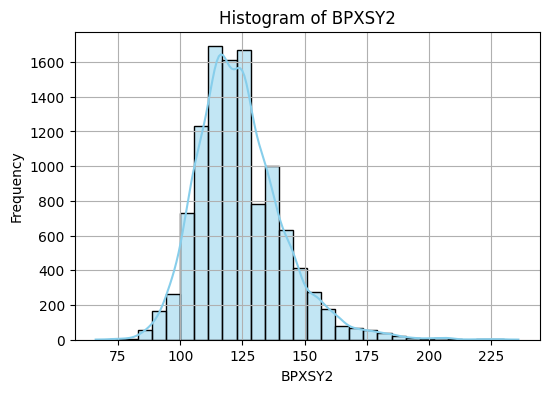

In [ ]:
hist_vars = boxplot_vars  # same list as above

for var in hist_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

/tmp/ipython-input-92-599475367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette="pastel")


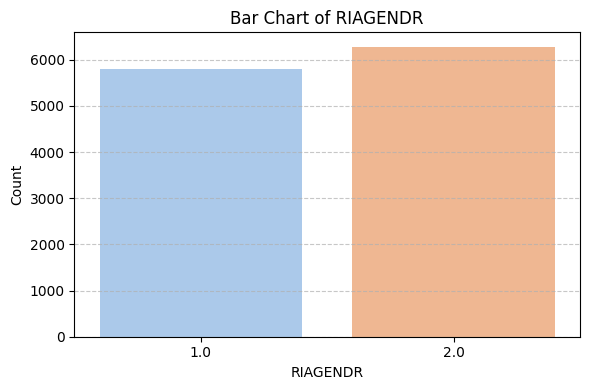

/tmp/ipython-input-92-599475367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette="pastel")


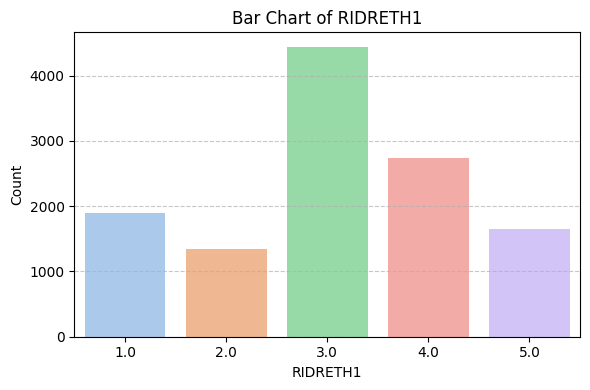

/tmp/ipython-input-92-599475367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette="pastel")


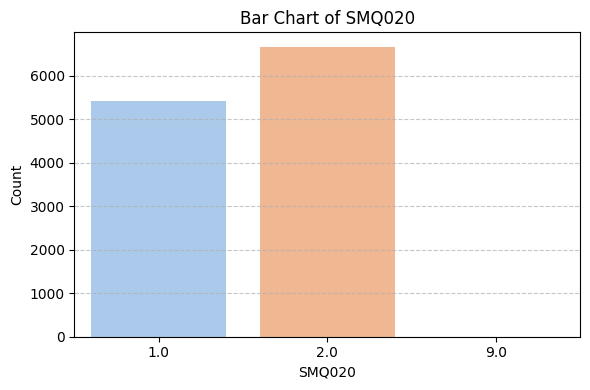

/tmp/ipython-input-92-599475367.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=var, palette="pastel")


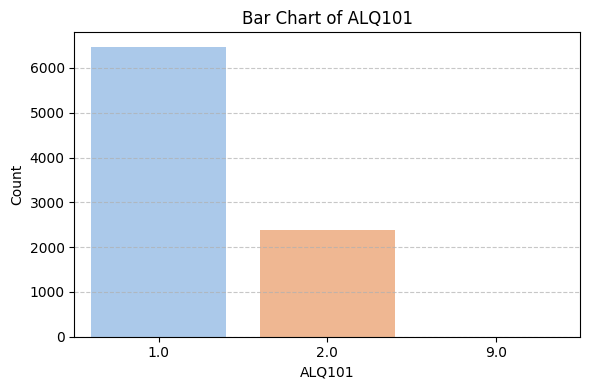

In [ ]:
categorical_vars = ["RIAGENDR", "RIDRETH1", "SMQ020", "ALQ101"]

for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=var, palette="pastel")
    plt.title(f"Bar Chart of {var}")
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


## 7. Dataset Exploration

| Variable     | Dataset     | Count | Mean   | Std Dev | Min  | 25%   | 50%   | 75%   | Max   |
| ------------ | ----------- | ----- | ------ | ------- | ---- | ----- | ----- | ----- | ----- |
| **LBDLDL**   | Uncleaned   | 5915  | 121.06 | 35.21   | 9.0  | 97.0  | 119.0 | 142.0 | 375.0 |
|              | **Cleaned** | 146   | 122.98 | 32.64   | 15.0 | 101.0 | 122.5 | 145.5 | 200.0 |
| **LBDHDD**   | Uncleaned   | 12536 | 52.93  | 16.73   | 6.0  | 41.0  | 50.0  | 62.0  | 179.0 |
|              | **Cleaned** | 146   | 58.03  | 19.61   | 17.0 | 45.0  | 53.0  | 69.0  | 173.0 |
| **BPXSY1**   | Uncleaned   | 12062 | 124.31 | 17.42   | 66.0 | 112.0 | 122.0 | 134.0 | 236.0 |
|              | **Cleaned** | 146   | 121.25 | 17.13   | 88.0 | 112.0 | 118.0 | 128.0 | 236.0 |
| **BMXBMI**   | Uncleaned   | 13096 | 29.90  | 7.17    | 13.6 | 25.0  | 28.7  | 33.4  | 130.2 |
|              | **Cleaned** | 146   | 27.15  | 4.66    | 18.3 | 23.5  | 26.4  | 29.9  | 42.0  |
| **RIDAGEYR** | Uncleaned   | 13655 | 49.87  | 6.10    | 40.0 | 45.0  | 50.0  | 55.0  | 60.0  |
|              | **Cleaned** | 146   | 49.37  | 6.04    | 40.0 | 45.0  | 49.0  | 54.0  | 60.0  |


### Observations

- **LBDLDL (LDL cholesterol)**:  
   **Mean is similar** (~121 vs 123), indicating cleaning didn't shift the average much.
   **Max in uncleaned data is 375 mg/dL**, while **cleaned max is 200** which suggests extreme outliers were removed.
   Cleaned dataset likely **more reliable** for LDL analysis due to outlier removal.

- **LBDHDD (HDL cholesterol)**:  
  **Cleaned mean is higher** (58 vs 53), suggesting lower HDL values were excluded during cleaning.  
  **Range is narrower** in cleaned data (min 17, max 173 vs 6 to 179).
  Cleaned data shows **higher central tendency** (median 53 vs 50), may reflect healthier sample subset.

- **BPXSY1 (Systolic Blood Pressure)**:  
  **Slightly lower mean** in cleaned data (121 vs 124), but similar spread (SD ~17).
  Distribution (25% to 75%) remains **identical**, indicating **consistency** despite sample size drop.

- **BMXBMI (Body Mass Index)**:  
  **Noticeably lower mean BMI** in cleaned data (27.15 vs 29.90), and **lower max value** (42 vs 130).
  Suggests extreme or invalid BMI values were dropped, reducing skew.
  Cleaned data gives **more typical BMI profile**, potentially closer to general population.

- **RIDAGEYR (Age)**:  
  Means and percentiles are **nearly identical** meaning that data cleaning had **minimal effect on age distribution**.
  Confirms that both datasets focus on the **40–60** age group.

## Frequency Tables for Categorical Variables

### RIAGENDR – Gender

| Gender | Code | Proportion (%) | Interpretation                                                                                         |
| ------ | ---- | -------------- | ------------------------------------------------------------------------------------------------------ |
| Male   | 1.0  | 48.23          | Just under half the participants are male, providing near-equal gender representation.                 |
| Female | 2.0  | 51.77          | Slightly more than half the participants are female, indicating a fairly balanced gender distribution. |

---

### RIDRETH1 – Race/Ethnicity

| Race & Ethnicity                           | Code | Proportion (%) | Interpretation                                                                                   |
| ----------------------------------- | ---- | -------------- | ------------------------------------------------------------------------------------------------ |
| Mexican American                    | 1.0  | 16.06          | This group accounts for around 16% of participants.                                              |
| Other Race - Including Multi-Racial | 2.0  | 10.19          | The smallest group here comprises roughly 10% of participants.                                   |
| Non-Hispanic White                  | 3.0  | 38.15          | The largest ethnic group comprises about 38% of participants, showing the predominant ethnicity. |
| Non-Hispanic Black                  | 4.0  | 23.00          | The second largest group makes up 23%, reflecting ethnic diversity.                              |
| Other Hispanic                      | 5.0  | 12.60          | This ethnicity represents about 12.6% of the sample.                                             |

---

### SMQ020 – Smoking Status

| Smoked ≥100 Cigarettes? | Code | Proportion (%) | Interpretation                                                                                      |
| ----------------------- | ---- | -------------- | --------------------------------------------------------------------------------------------------- |
| Yes                     | 1.0  | 45.42          | Nearly half have smoked 100 or more cigarettes, reflecting a sizable smoking history.               |
| No                      | 2.0  | 54.55          | Over half of participants have not smoked at least 100 cigarettes, indicating majority non-smokers. |
| Unknown/Refused         | 9.0  | 0.03           | A very small fraction have missing or invalid responses.                                            |

---

### PAQ605 – Physical Activity ≥10 min

| Physical Activity ≥10 min | Code | Proportion (%) | Interpretation |
|---------------------------|------|----------------|----------------|
| Yes                       | 1    | 50.14          | Roughly half the participants reported engaging in vigorous physical activity lasting at least 10 minutes, providing insights into active versus inactive lifestyle effects |
| No                        | 2    | 49.86          |                |

---
### ALQ101 – Alcohol Consumption

| Had ≥12 Drinks/Year? | Code | Proportion (%) | Interpretation                                                                                                        |
| -------------------- | ---- | -------------- | --------------------------------------------------------------------------------------------------------------------- |
| Yes                  | 1.0  | 54.69          | Slightly more than half reported having at least 12 drinks in the past year, indicating moderate to high alcohol use. |
| No                   | 2.0  | 20.40          | Around 20% reported not having 12 or more drinks in a year, indicating lower alcohol consumption.                     |
| Unknown/Refused      | 9.0  | 0.04           | A negligible proportion had invalid or refused responses on alcohol consumption.                                      |
| Missing              | NaN  | 24.87          | About a quarter of responses are missing, which may affect analysis completeness.                                     |

---

Annual Trend Analysis

=== Median Values by Year (Cycle) ===
   SDDSRVYR  LBDLDL  LBDHDD  BPXSY1  BMXBMI
0       5.0   122.0    49.0   122.0   28.58
1       6.0   122.0    50.0   122.0   28.74
2       7.0   119.0    50.0   122.0   28.50
3       8.0   116.0    50.0   120.0   28.30
4       9.0   119.0    50.0   124.0   29.10
5      10.0   116.0    50.0   124.0   29.20


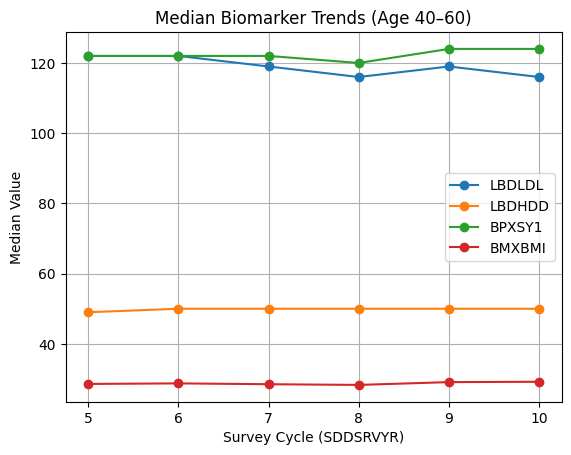

In [ ]:
# Step 1: Median values for LDL, HDL, SBP (BPXSY1), and BMI per NHANES cycle
biomarkers = ["LBDLDL", "LBDHDD", "BPXSY1", "BMXBMI"]

# Group by survey cycle (SDDSRVYR_x) and calculate medians
annual_medians = df.groupby("SDDSRVYR")[biomarkers].median().reset_index()

print("=== Median Values by Year (Cycle) ===")
print(annual_medians)

# Plotting the trends
import matplotlib.pyplot as plt

for var in biomarkers:
    plt.plot(annual_medians["SDDSRVYR"], annual_medians[var], marker='o', label=var)

plt.title("Median Biomarker Trends (Age 40–60)")
plt.xlabel("Survey Cycle (SDDSRVYR)")
plt.ylabel("Median Value")
plt.legend()
plt.grid(True)
plt.show()

=== Hypertension Percentage by Cycle ===
   SDDSRVYR  Hypertension
0       5.0         29.80
1       6.0         29.59
2       7.0         29.14
3       8.0         26.70
4       9.0         34.64
5      10.0         32.66


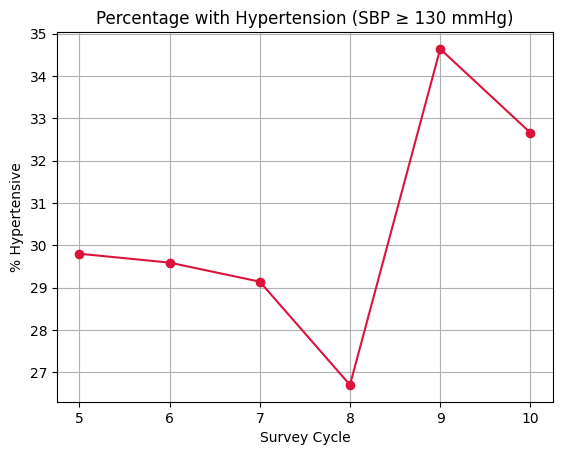

In [ ]:
# Step 2: Hypertension % per cycle (SBP ≥ 130)
df["Hypertension"] = df["BPXSY1"] >= 130

hypertension_pct = df.groupby("SDDSRVYR")["Hypertension"].mean().reset_index()
hypertension_pct["Hypertension"] = (hypertension_pct["Hypertension"] * 100).round(2)

print("=== Hypertension Percentage by Cycle ===")
print(hypertension_pct)

# Plot
plt.plot(hypertension_pct["SDDSRVYR"], hypertension_pct["Hypertension"], marker='o', color='crimson')
plt.title("Percentage with Hypertension (SBP ≥ 130 mmHg)")
plt.xlabel("Survey Cycle")
plt.ylabel("% Hypertensive")
plt.grid(True)
plt.show()

=== Abnormal Biomarker Rates by Cycle ===
   SDDSRVYR  High_LDL  Low_HDL
0       5.0     18.76    20.86
1       6.0     19.29    20.87
2       7.0     16.95    18.18
3       8.0     16.37    19.12
4       9.0     15.47    19.58
5      10.0     15.72    17.17


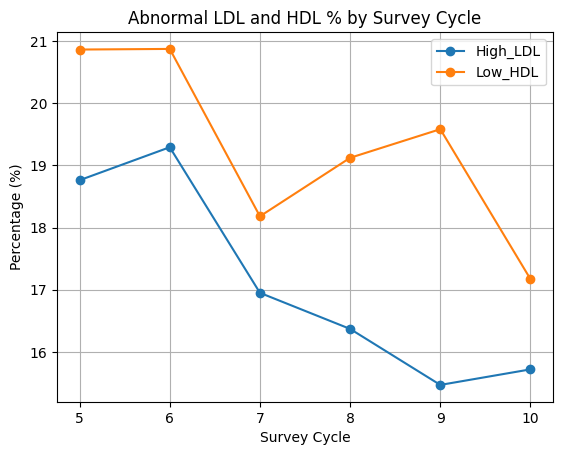

In [ ]:
# Step 3: Define abnormal thresholds
df["High_LDL"] = df["LBDLDL"] >= 130
df["Low_HDL"] = df["LBDHDD"] < 40

abnormal_rates = df.groupby("SDDSRVYR")[["High_LDL", "Low_HDL"]].mean().reset_index()
abnormal_rates[["High_LDL", "Low_HDL"]] = (abnormal_rates[["High_LDL", "Low_HDL"]] * 100).round(2)

print("=== Abnormal Biomarker Rates by Cycle ===")
print(abnormal_rates)

# Plot
abnormal_rates.plot(x="SDDSRVYR", y=["High_LDL", "Low_HDL"], marker='o')
plt.title("Abnormal LDL and HDL % by Survey Cycle")
plt.xlabel("Survey Cycle")
plt.ylabel("Percentage (%)")
plt.grid(True)
plt.show()

In [ ]:
# Add SDDSRVYR to df (if missing)
if 'SDDSRVYR' not in df.columns:
    df = df.merge(df_rx[['SEQN', 'SDDSRVYR']].drop_duplicates(), on='SEQN', how='left')

# Now create participant-cycle flags
df_cvd_flag = df[['SEQN', 'SDDSRVYR']].drop_duplicates()

df_cvd_flag['on_med'] = df_cvd_flag.merge(
    rx_cvd[['SEQN', 'SDDSRVYR', 'is_cvd_drug']],
    on=['SEQN', 'SDDSRVYR'],
    how='left'
)['is_cvd_drug'].fillna(False)

med_pct = df_cvd_flag.groupby('SDDSRVYR')['on_med'].mean() * 100

print("💊 % Taking CVD-Related Medication by Year:")
print(med_pct.round(2))

NameError: name 'rx_cvd' is not defined

In [ ]:
# Step 4 – Medication % (requires prescription data)
# Assumes df_rx with ['SEQN', 'RXDDRUG', 'SDDSRVYR'] already merged
# and df as main dataframe with ['SEQN', 'SDDSRVYR']

def decode_and_str(val):
    if isinstance(val, bytes):
        return val.decode('utf-8')
    elif isinstance(val, str):
        return val
    else:
        return None  # Handles NaN or other types

# Decode RXDDRUG safely and ensure string dtype
df_rx['RXDDRUG'] = df_rx['RXDDRUG'].apply(decode_and_str).fillna('')

# Filter for CVD-related meds using case-insensitive matching
df_rx['is_cvd_drug'] = df_rx['RXDDRUG'].str.lower().str.contains(
    'statin|atorvastatin|amlodipine|lisinopril|losartan', na=False)

# Deduplicate to 1 row per participant per cycle with CVD medication
rx_cvd = df_rx[df_rx['is_cvd_drug']].drop_duplicates(subset=['SEQN', 'SDDSRVYR'])

# Get unique participant-cycle pairs from main df
df_cvd_flag = df[['SEQN', 'SDDSRVYR']].drop_duplicates()

# Merge to flag participants on CVD meds
df_cvd_flag['on_med'] = df_cvd_flag.merge(
    rx_cvd[['SEQN', 'SDDSRVYR', 'is_cvd_drug']],
    on=['SEQN', 'SDDSRVYR'],
    how='left'
)['is_cvd_drug'].fillna(False)

# Calculate % on medication per cycle
med_pct = df_cvd_flag.groupby('SDDSRVYR')['on_med'].mean() * 100

print("💊 % Taking CVD-Related Medication by Year:")
print(med_pct.round(2))

NameError: name 'df_rx' is not defined

In [ ]:
# Add SDDSRVYR to df (if missing)
if 'SDDSRVYR' not in df.columns:
    df = df.merge(df_rx[['SEQN', 'SDDSRVYR']].drop_duplicates(), on='SEQN', how='left')

# Now create participant-cycle flags
df_cvd_flag = df[['SEQN', 'SDDSRVYR']].drop_duplicates()

df_cvd_flag['on_med'] = df_cvd_flag.merge(
    rx_cvd[['SEQN', 'SDDSRVYR', 'is_cvd_drug']],
    on=['SEQN', 'SDDSRVYR'],
    how='left'
)['is_cvd_drug'].fillna(False)

med_pct = df_cvd_flag.groupby('SDDSRVYR')['on_med'].mean() * 100

print("💊 % Taking CVD-Related Medication by Year:")
print(med_pct.round(2))

In [ ]:
# Step 4 – Medication % (requires prescription data)
# Assumes df_rx with ['SEQN', 'RXDDRUG', 'SDDSRVYR'] already merged
# and df as main dataframe with ['SEQN', 'SDDSRVYR']

def decode_and_str(val):
    if isinstance(val, bytes):
        return val.decode('utf-8')
    elif isinstance(val, str):
        return val
    else:
        return None  # Handles NaN or other types

# Decode RXDDRUG safely and ensure string dtype
df_rx['RXDDRUG'] = df_rx['RXDDRUG'].apply(decode_and_str).fillna('')

# Filter for CVD-related meds using case-insensitive matching
df_rx['is_cvd_drug'] = df_rx['RXDDRUG'].str.lower().str.contains(
    'statin|atorvastatin|amlodipine|lisinopril|losartan', na=False)

# Deduplicate to 1 row per participant per cycle with CVD medication
rx_cvd = df_rx[df_rx['is_cvd_drug']].drop_duplicates(subset=['SEQN', 'SDDSRVYR'])

# Get unique participant-cycle pairs from main df
df_cvd_flag = df[['SEQN', 'SDDSRVYR']].drop_duplicates()

# Merge to flag participants on CVD meds
df_cvd_flag['on_med'] = df_cvd_flag.merge(
    rx_cvd[['SEQN', 'SDDSRVYR', 'is_cvd_drug']],
    on=['SEQN', 'SDDSRVYR'],
    how='left'
)['is_cvd_drug'].fillna(False)

# Calculate % on medication per cycle
med_pct = df_cvd_flag.groupby('SDDSRVYR')['on_med'].mean() * 100

print("💊 % Taking CVD-Related Medication by Year:")
print(med_pct.round(2))

💊 % Taking CVD-Related Medication by Year:
SDDSRVYR
5.0      23.68962
6.0     28.426396
7.0           NaN
8.0           NaN
9.0           NaN
10.0          NaN
Name: on_med, dtype: object


/tmp/ipython-input-100-315083703.py:31: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  )['is_cvd_drug'].fillna(False)


# 8. Annual Trends – Interpretation Template

### Median Values for Biomarkers and Continuous Variables

> “This trend in the median values for LDL, HDL, Systolic BP, and BMI across Survey Cycles 5-10 for the 40-60 age group is noteworthy. While this suggests consistent average health profiles, it also implies a plateau in improvements for these key cardiovascular indicators within this demographic. This might reflect a mature public health response that has achieved equilibrium but indicates that further, more intensive interventions might be needed to significantly lower these median values and reduce overall population risk for CVD.”

### Percentage of Diagnosed Cases (Hypertension or Hyperlipidemia)

> “The dramatic surge in hypertension prevalence, especially the jump from approximately 27% in Cycle 8 to 35% in Cycle 9, is a critical concern. This sharp increase, after an initial period of relative stability, could indicate a true rise in the incidence of hypertension due to evolving lifestyle factors, an aging population, or potentially broadened diagnostic criteria. This trend shows a rapidly increasing burden of cardiovascular disease risk in the population and underscores the urgent need to intensified public health strategies for early detection and management of hypertension”

### Percentage in High-Risk or Abnormal Biomarker Ranges

> “The general decreasing trend in both high LDL and low HDL percentages, notably from ~19% to ~16% for high LDL and ~21% to ~17% for low HDL, is a positive development. This suggests that the successful efforts in managing dyslipidemia within the population, likely stemming from increased awareness, improved dietary habits, and more effective clinical management or increased use of lipid-lowering medications. This is promising for the long-term reduction of cardiovascular disease risk.”

### Percentage Taking Medication (e.g., statins, antihypertensives)

> “The increase in CVD-related medication uptake from approximately 24% in Cycle 5 to 28% in Cycle 6 suggests an intensified medical response to cardiovascular conditions. This means reflect better disease detection, improved access to treatment, or evolving clinical guidelines advocating for earlier medication. ”


In [ ]:
print(df.columns)
print(df_rx.columns)



Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMQMILIT', 'INDFMPIR', 'RIDRETH1',
       'BMXBMI', 'SMQ020', 'SMQ040', 'ALQ101', 'ALQ130', 'PAD680', 'PAD660',
       'PAD675', 'BPXSY1', 'BPXSY2', 'LBXTC', 'SDDSRVYR', 'LBDLDL', 'LBDHDD',
       'Hypertension', 'High_LDL', 'Low_HDL'],
      dtype='object')
Index(['SEQN', 'RXDDRUG', 'SDDSRVYR', 'is_cvd_drug'], dtype='object')


In [ ]:
# Load Prescription data (RXQ_RX)
#rx_urls = [f"https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/{y}/DataFiles/RXQ_RX_{c}.xpt"
#           for y, c in zip(years, cycles)]

#df_rx = pd.concat([pd.read_sas(url) for url in rx_urls])

#print("=== Prescription Data (df_rx) Loaded ===")
#display(df_rx.head())

# Use load_data function to load Prescription data (RXQ_RX)
years_rx = ["2007", "2009", "2011", "2013", "2015", "2017"]
cycles_rx = ["E", "F", "G", "H", "I", "J"] # Corrected variable name
sddsrvyrs_rx = [5, 6, 7, 8, 9, 10] # Corrected variable name



df_rx = load_data(
    "RXQ_RX", ["SEQN", "RXDDRUG"], years_rx, cycles_rx, sddsrvyrs_rx
)

print("=== Prescription Data (df_rx) Loaded using load_data ===")
display(df_rx.head())

=== Prescription Data (df_rx) Loaded using load_data ===


,SEQN,RXDDRUG,SDDSRVYR
0,41475.0,b'ATENOLOL',5
1,41475.0,b'HYDROCHLOROTHIAZIDE',5
2,41475.0,b'LEVOTHYROXINE',5
3,41475.0,b'LOVASTATIN',5
4,41476.0,b'MUPIROCIN TOPICAL',5


## 8. Data Cleaning and Filtering

In [ ]:
# Filter for participants aged 40-60
df_filtered = df[(df['RIDAGEYR'] >= 40) & (df['RIDAGEYR'] <= 60)].copy()

print(f"Shape after age filtering: {df_filtered.shape}")

# Define the columns required for analysis based on inclusion criteria
required_cols = [
    'SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'BMXBMI',
    'SMQ020', 'ALQ101', 'PAD680', 'BPXSY1', 'LBDLDL', 'LBDHDD'
]

# Drop rows with missing values in any of the required columns
df_cleaned = df_filtered.dropna(subset=required_cols).copy()

print(f"Shape after filtering for required columns: {df_cleaned.shape}")

# Display the first few rows of the cleaned dataframe
print("\nFirst 5 rows of the cleaned dataframe:")
display(df_cleaned.head())

# Display summary statistics for the cleaned data
print("\nSummary statistics of the cleaned dataframe:")
display(df_cleaned.describe())

Shape after age filtering: (12085, 23)
Shape after filtering for required columns: (3737, 23)

First 5 rows of the cleaned dataframe:


,SEQN,RIAGENDR,RIDAGEYR,DMQMILIT,INDFMPIR,RIDRETH1,BMXBMI,SMQ020,SMQ040,ALQ101,...,PAD675,BPXSY1,BPXSY2,LBXTC,SDDSRVYR,LBDLDL,LBDHDD,Hypertension,High_LDL,Low_HDL
4,41479.0,1.0,52.0,2.0,2.20,1.0,27.56,2.0,NaN,1.0,...,NaN,112.0,108.0,188.0,5.0,121.0,47.0,False,False,False
14,41489.0,2.0,40.0,2.0,2.15,1.0,36.59,2.0,NaN,1.0,...,NaN,106.0,114.0,188.0,5.0,106.0,62.0,False,False,False
19,41494.0,1.0,40.0,2.0,1.30,1.0,25.46,1.0,2.0,1.0,...,NaN,120.0,108.0,223.0,5.0,153.0,47.0,False,True,False
43,41518.0,1.0,50.0,2.0,5.00,3.0,29.12,2.0,NaN,1.0,...,180.0,114.0,112.0,179.0,5.0,108.0,49.0,False,False,False
50,41525.0,1.0,51.0,2.0,2.84,4.0,25.22,1.0,3.0,2.0,...,NaN,122.0,122.0,181.0,5.0,107.0,34.0,False,False,True



Summary statistics of the cleaned dataframe:


,SEQN,RIAGENDR,RIDAGEYR,DMQMILIT,INDFMPIR,RIDRETH1,BMXBMI,SMQ020,SMQ040,ALQ101,ALQ130,PAD680,PAD660,PAD675,BPXSY1,BPXSY2,LBXTC,SDDSRVYR,LBDLDL,LBDHDD
count,3737.000000,3737.000000,3737.000000,1611.000000,3.428000e+03,3737.000000,3737.000000,3737.000000,1784.000000,3737.000000,2622.000000,3.737000e+03,704.000000,1470.000000,3737.000000,3679.000000,3737.000000,3737.000000,3737.000000,3737.000000
mean,67091.153599,1.509232,50.088841,1.905028,2.704974e+00,2.947284,29.738095,1.526358,2.054372,1.263045,4.557208,3.767972e+02,69.204545,63.893197,123.095531,122.393585,201.188922,6.945678,121.976184,54.120685
std,15302.533882,0.499982,6.123779,0.293267,1.690577e+00,1.156470,6.936643,0.528536,0.960734,0.457049,41.783882,4.918913e+02,50.487729,61.089686,16.920640,16.751373,39.523008,1.416291,35.010280,16.344300
min,41479.000000,1.000000,40.000000,1.000000,5.397605e-79,1.000000,13.600000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,10.000000,10.000000,66.000000,66.000000,93.000000,5.000000,15.000000,6.000000
25%,53841.000000,1.000000,45.000000,2.000000,1.160000e+00,2.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.800000e+02,40.000000,30.000000,112.000000,112.000000,174.000000,6.000000,98.000000,43.000000
50%,66246.000000,2.000000,50.000000,2.000000,2.390000e+00,3.000000,28.550000,2.000000,2.000000,1.000000,2.000000,3.000000e+02,60.000000,45.000000,122.000000,120.000000,200.000000,7.000000,120.000000,51.000000
75%,80714.000000,2.000000,55.000000,2.000000,4.620000e+00,4.000000,33.100000,2.000000,3.000000,2.000000,3.000000,4.800000e+02,60.000000,60.000000,132.000000,132.000000,226.000000,8.000000,144.000000,63.000000
max,93663.000000,2.000000,60.000000,2.000000,5.000000e+00,5.000000,68.700000,9.000000,3.000000,9.000000,999.000000,9.999000e+03,360.000000,600.000000,236.000000,226.000000,463.000000,9.000000,375.000000,173.000000
